# Experimentación en Python - Análisis de tiempos de ejecución

En esta notebook intentaremos centrarnos en responder una duda:
$\textbf{El uso de threads produce una mejora en el tiempo total de ejecución?}$

Para responder la pregunta tuvimos que tomar muestras de los tiempos propiamente dichos. Para llevar a cabo el muestreo
se ejecutó reiteradamente el programa, con el fin de obtener graficos y conclusiónes lo más representativas posibles.

In [2]:
# Importamos las librerías básicas y necesarias

import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

¿Más threads, mejor performance?
¿Cuál es mi hipótesis? ¿Qué espero observar?
¿La ganancia de performance es proporcional a la cantidad de threads?
¿Cómo influye el tamaño de una imagen en la performance?
¿Varía de filtro en filtro?
¿Será cierto que si considero imagenes más chicas aún conviene hacer multi-threading?

In [3]:
for n_threads in range(1,50):
    
    cmd = "../src/main shades " + str(n_threads) + "10 0 ../imagenesIn/imagen_chica.ppm ../imagenesIn/imagen_chica.ppm"
    os.system(cmd)

In [4]:
dataframe = pd.read_csv('test_imgChica.csv', names=['Tiempo','Threads', 'Filtro', 'Tamaño (pixeles)'])
dataframe


,Tiempo,Threads,Filtro,Tamaño (pixeles)
0,NaN,NaN,NaN,NaN
1,0.007827,1.0,shades,25440.0
2,0.003852,2.0,shades,25440.0
3,0.002849,3.0,shades,25440.0
4,0.002328,4.0,shades,25440.0
5,0.002113,5.0,shades,25440.0
6,0.002130,6.0,shades,25440.0
7,0.002572,7.0,shades,25440.0
8,0.004297,8.0,shades,25440.0
9,0.002336,9.0,shades,25440.0


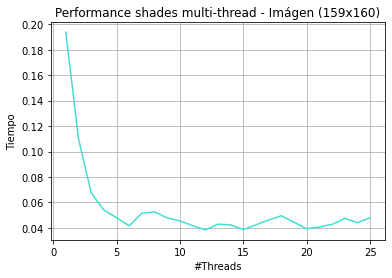

In [12]:
def plot(ths, time, std):
    
    fig, ax = plt.subplots()
    ax.plot(ths, time, 'b-',color='turquoise')
    if np.any(std) != 0:
        ax.fill_between(ths, time-std, time+std, color='turquoise')


    ax.set(xlabel='#Threads', ylabel='Tiempo',
           title='Performance shades multi-thread - Imágen (159x160)')
    ax.grid()

    fig.savefig("test.png")
    plt.show()

ths = dataframe['Threads']
time = dataframe['Tiempo']
plot(ths,time, 0)

In [6]:
dataframe = pd.read_csv('test_imgMediana.csv', names=['Tiempo','Threads', 'Filtro', 'Tamaño (pixeles)'])
dataframe


,Tiempo,Threads,Filtro,Tamaño (pixeles)
0,NaN,NaN,NaN,NaN
1,0.034000,1.0,shades,113850.0
2,0.018221,2.0,shades,113850.0
3,0.013242,3.0,shades,113850.0
4,0.009624,4.0,shades,113850.0
5,0.010584,5.0,shades,113850.0
6,0.008882,6.0,shades,113850.0
7,0.009299,7.0,shades,113850.0
8,0.011409,8.0,shades,113850.0
9,0.009032,9.0,shades,113850.0


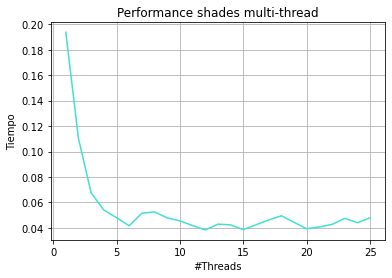

In [10]:
ths = dataframe['Threads']
time = dataframe['Tiempo']
plot(ths,time, 0)

In [8]:
dataframe = pd.read_csv('test_imgGrande.csv', names=['Tiempo','Threads', 'Filtro', 'Tamaño (pixeles)'])
dataframe

,Tiempo,Threads,Filtro,Tamaño (pixeles)
0,0.193716,1,shades,649600
1,0.110247,2,shades,649600
2,0.067514,3,shades,649600
3,0.054072,4,shades,649600
4,0.048014,5,shades,649600
5,0.041700,6,shades,649600
6,0.051544,7,shades,649600
7,0.052551,8,shades,649600
8,0.047857,9,shades,649600
9,0.045506,10,shades,649600


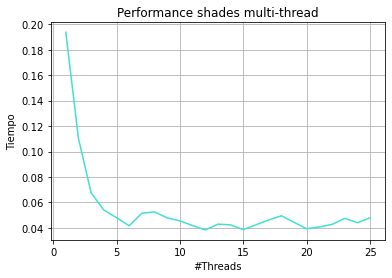

In [11]:
ths = dataframe['Threads']
time = dataframe['Tiempo']
plot(ths,time, 0)